# Day 3: Portfolio Return & Volatility


## 🎯 Objective
Calculate daily and annualized **portfolio return** and **volatility** using historical stock prices and portfolio weights.

Understand how diversification impacts portfolio risk using real stock data.



## 📘 Theory Recap


### 📊 Portfolio Return  
When you invest in multiple assets (stocks, bonds, etc.), your total return is a **weighted average** of the returns of the individual assets. The weight depends on how much of your total money is invested in each asset.

- **Formula**:  
  \[
  R_p = w_1 R_1 + w_2 R_2 + \dots + w_n R_n
  \]  
  Where \( R_p \) is the portfolio return, \( w_i \) is the weight of the \( i \)-th asset, and \( R_i \) is its return.

- **Why It Matters**:  
  Portfolio return helps you measure **how much your overall investments have gained or lost** over a period.

---

### 📉 Portfolio Volatility (Risk)  
Volatility is the **degree of variation** in returns — essentially, it tells you **how risky** your portfolio is. In technical terms, it's measured by the **standard deviation** of returns.

- Higher volatility = returns swing a lot (more risk).  
- Lower volatility = returns are stable (less risk).  

- For a portfolio, volatility is **not just** the weighted average of asset volatilities — it also depends on **correlations** between assets.

---

### 📅 Annualization  
Financial metrics are often standardized to a yearly basis for easy comparison:

- **Annualized Return** =  
  Mean Daily Return * 252 
  (252 trading days in a year)

- **Annualized Volatility** =  
Std Dev of Daily Returns * sqrt{252}

---

### 🧠 Diversification  
Diversification means spreading your investments across multiple assets or sectors to **reduce unsystematic risk** (company-specific or sector-specific risk).  
Even if one stock drops, others may rise, balancing the overall impact.

- The key benefit is that **the portfolio can be less volatile than the individual stocks** due to imperfect correlations.


In [46]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [47]:

# Define portfolio tickers and weights
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weights
start_date = '2023-01-01'
end_date = '2024-07-26'


In [48]:

# Download historical adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Close']

data.head()


C:\Users\vedik\AppData\Local\Temp\ipykernel_18108\3030809936.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[                       0%                       ]

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-01-03,123.470619,85.820000,88.588707,234.808960
2023-01-04,124.744125,85.139999,87.554909,224.537628
2023-01-05,123.421272,83.120003,85.686111,217.882843
2023-01-06,127.962410,86.080002,86.819321,220.450684
2023-01-09,128.485641,87.360001,87.495255,222.597061


In [49]:

# Daily returns
returns = data.pct_change().dropna()

# Portfolio daily returns
portfolio_daily_returns = returns.dot(weights)

# Portfolio cumulative return
cumulative_return = (1 + portfolio_daily_returns).cumprod()


In [50]:

# Annualized metrics
trading_days = 252
annualized_return = portfolio_daily_returns.mean() * trading_days
annualized_volatility = portfolio_daily_returns.std() * np.sqrt(trading_days)

print(f"Annualized Portfolio Return: {annualized_return:.2%}")
print(f"Annualized Portfolio Volatility: {annualized_volatility:.2%}")


Annualized Portfolio Return: 43.87%
Annualized Portfolio Volatility: 21.06%


### 📘 Why We Transform Price Data to Returns

To evaluate a portfolio of multiple stocks, we need to convert raw price data into daily returns and analyze how the portfolio behaves over time. Here’s what each transformation does:

1. **Daily Returns**  
   `returns = data.pct_change().dropna()`  
   - Calculates the daily percentage change for each stock.
   - This standardizes price changes and lets us compare or aggregate performance across stocks.
   - `dropna()` removes the first row which lacks a previous day.

2. **Portfolio Daily Returns**  
   `portfolio_daily_returns = returns.dot(weights)`  
   - Computes the weighted sum of daily returns across all assets.
   - Reflects the combined daily performance based on your portfolio allocation.

3. **Portfolio Cumulative Return**  
   `cumulative_return = (1 + portfolio_daily_returns).cumprod()`  
   - Transforms daily returns into cumulative return over time by compounding.
   - Tells you how much your portfolio would grow if you started with $1.

### 💡 Summary

| Step                     | Purpose                                              |
|--------------------------|------------------------------------------------------|
| `pct_change()`           | Converts price to return                             |
| `.dot(weights)`          | Combines asset returns using portfolio allocation    |
| `(1 + return).cumprod()` | Tracks compounded growth of the entire portfolio     |

These steps are essential for understanding portfolio performance, volatility, and risk.


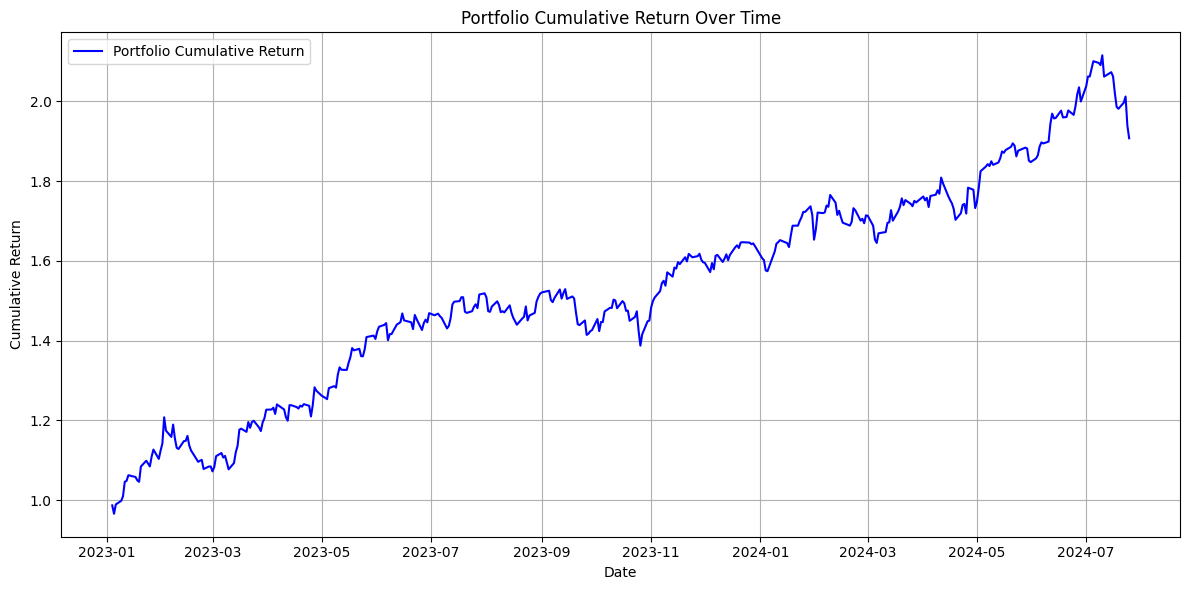

In [51]:

# Plot portfolio cumulative return
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return, label='Portfolio Cumulative Return', color='blue')
plt.title("Portfolio Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
